# Expectation Maximization and the Lower Bound

In statistics, we often need to fit a statistical model to our observations. This model can serve as a compact representation of the observations, it can be used to sample synthetic data points, or to assess the likelihood that an observation was created by the model. After defining a parametric model, we need to adjust its parameters such that the model describes the data best. These parameters can be estimated by maximizing the (log) likelihood of the data with respect to the model parameters. For many models involving unobserved (latent) variables, the log likelihood of the data may be difficult to optimize. In these cases, it may be more convenient to maximize the log likelihood of the joint distribution over both observed and latent variables.

Expectation Maximization (EM) is a useful algorithm to obtain maximum likelihood estimates of the parameters of a model involving latent variables. Following Section 9.4 in Christopher Bishop's excellent book "Pattern Recognition and Machine Learning", this notebook illustrates the general form of the EM algorithm.

Equation numbers are consistent with the book.

## Preliminaries

Let us assume that the observations $\mathbf{X}$ can be described by a mixture of $K$ Gaussians, that is

$$
p(\mathbf{X}) = \sum\limits_{k=1}^K \pi_k \mathcal{N}(\mathbf{X} \lvert \mu_k, \sigma_k^2) = \prod\limits_{n=1}^N \sum\limits_{k=1}^K \pi_k \mathcal{N}(x_n \lvert \mu_k, \sigma_k^2) \quad.
\tag{9.7}
$$

Our goal is to estimate the parameters $\mathbf{\theta} = \{\mu_k, \sigma_k^2, \pi_k\}$ for all $K$ components. The parameters $\pi_k$ are mixing coefficients and their sum over all classes must equal to $1$.

Given a set of observations, we don't know which of the Gaussians each sample originates from. We define a $K$-dimensional binary binary random variable $\mathbf{z_n}$ for each observation $x_n$. All elements of $\mathbf{z_n}$ are zero except for position $k$ when $\mathbf{x_n}$ was generated by the $k$-th component. Using the 1-of-K representation, the distribution over $\mathbf{Z}$ can be written in the form

$$
p(\mathbf{Z}) = \prod\limits_{k=1}^K \pi_k^{z_k} \quad.
\tag{9.10}
$$

We call $\mathbf{Z}$ the set of latent variables, because they cannot be observed.

The conditional distribution of $x_n$ given a particular value for $\mathbf{z_n}$ can be written as

$$
p(x_n \lvert z_{nk} = 1) = \mathcal{N}(x_n \lvert \mu_k, \sigma^2_k) =\prod\limits_{k=1}^K \mathcal{N}(x_n \lvert \mu_k, \sigma^2_k)^{z_{nk}} \quad.
\tag{9.11}
$$

Section 9.2 described that the marginal distribution of $\mathbf{X}$ can also be obtained by summing the joint distribution over all possible states of $\mathbf{Z}$ to give:

$$
p(\mathbf{X}) = \sum_\mathbf{Z} p(\mathbf{Z}) p(\mathbf{X} \lvert \mathbf{Z}) = \sum\limits_{k=1}^K \pi_k \mathcal{N}(\mathbf{X} \lvert \mu_k, \sigma^2_k)
\tag{9.12}
$$

Next, we would like to maximize the log marginal likelihood, given by

$$
\ln p(\mathbf{X} \lvert \mathbf{\theta}) = \sum\limits_{n=1}^{N} \ln \sum\limits_{k=1}^K \pi_k \mathcal{N}(x_n \lvert \mu_k, \sigma^2_k) \quad.
\tag{9.14}
$$

As can be seen from (9.14), the log operates on the sum and does not cancel out the exp, leading to a difficult expression to optimize.

Therefore, it is more convenient to optimize the log of the joint distribution over observations and latent variables.

\begin{align}
\ln p(\mathbf{X}, \mathbf{Z}) &= \ln \prod\limits_{k=1}^K \left[ \pi_k \mathcal{N}(\mathbf{X} \lvert \mu_k, \sigma^2_k) \right]^{\mathbf{z_k}} \\
&= \ln \prod\limits_{k=1}^K \prod\limits_{n=1}^N \left[ \pi_k \mathcal{N}(x_n \lvert \mu_k, \sigma^2_k) \right]^{z_{nk}} \\
&= \sum\limits_{k=1}^K \sum\limits_{n=1}^N z_{nk} \left[ \ln \pi_k + \ln \mathcal{N}(x_n \lvert \mu_k, \sigma^2_k) \right]
\end{align}

This is also called complete-data log likelihood. In the M-step, we replace $\mathbf{Z}$ with its expected value, that is, 

$$
\mathbb{E}_\mathbf{Z}\left[p(\mathbf{X}, \mathbf{Z} \lvert \mathbf{\theta})\right] = \sum\limits_{n=1}^N \sum\limits_{k=1}^K \gamma(z_{nk}) \left[\ln \pi_k + \ln \mathcal{N}(x_n \lvert \mu_k, \sigma^2_k) \right]
\tag{9.40}
$$

The joint likelihood requires the expecation of the random variables $\mathbf{z_n}$, giving rise to an iterative optimization procedure. In the E-step, we compute the expectation of the latent variables $\mathbf{Z}$. In the M-step, we maximize the complete-data log likelihood with respect to the parameters. These two steps are repeated until convergence.

The EM algorithm guarantees to increase the log likelihood after every pair of steps (or stagnate when it has reached a local maximum). This can be illustrated by decomposing the marginal likelihood.

## Lower bound

For any distribution $q(\mathbf{Z})$, the following decomposition holds

$$
p(\mathbf{X} \lvert \mathbf{\theta}) = \mathcal{L}(q, \mathbf{\theta}) + \text{KL}(q \| p)
\tag{9.70}
$$

with

$$
\mathcal{L}(q, \mathbf{\theta}) = \sum_\mathbf{Z} q(\mathbf{Z}) \ln \left[ \frac{p(\mathbf{X}, \mathbf{Z} \lvert \mathbf{\theta})}{q(\mathbf{Z})} \right]
\tag{9.71}
$$
$$
\text{KL}(q \| p) = -\sum_\mathbf{Z} q(\mathbf{Z}) \ln \left[ \frac{p(\mathbf{Z} \lvert \mathbf{X}, \mathbf{\theta})}{q(\mathbf{Z})} \right]
\tag{9.72}
$$


Let us verify Equation (9.70).

\begin{align}
\mathcal{L}(q, \mathbf{\theta}) + \text{KL}(q \| p)
&= \sum_\mathbf{Z} q(\mathbf{Z}) \ln \left[ \frac{p(\mathbf{X}, \mathbf{Z} \lvert \mathbf{\theta})}{q(\mathbf{Z})} \right] -\sum_\mathbf{Z} q(\mathbf{Z}) \ln \left[ \frac{p(\mathbf{Z} \lvert \mathbf{X}, \mathbf{\theta})}{q(\mathbf{Z})} \right] \\
&= \sum_\mathbf{Z} q(\mathbf{Z}) \left[ \ln \frac{p(\mathbf{X}, \mathbf{Z} \lvert \mathbf{\theta})}{q(\mathbf{Z})}  -\ln \frac{p(\mathbf{Z} \lvert \mathbf{X}, \mathbf{\theta})}{q(\mathbf{Z})} \right] \\
&= \sum_\mathbf{Z} q(\mathbf{Z}) \ln \left[\frac{p(\mathbf{X}, \mathbf{Z} \lvert \mathbf{\theta})}{q(\mathbf{Z})}  \cdot \frac{q(\mathbf{Z})}{p(\mathbf{Z} \lvert \mathbf{X}, \mathbf{\theta})} \right] \\
&= \sum_\mathbf{Z} q(\mathbf{Z}) \ln \left[\frac{p(\mathbf{X}, \mathbf{Z} \lvert \mathbf{\theta})}{p(\mathbf{Z} \lvert \mathbf{X}, \mathbf{\theta})} \right] \\
&= \underbrace{\sum_\mathbf{Z} q(\mathbf{Z})}_{=1} \underbrace{\ln p(\mathbf{X} \lvert \mathbf{\theta})}_{\text{independent of }\mathbf{Z}} \\
&= \ln p(\mathbf{X} \lvert \mathbf{\theta})
\end{align}

From this decomposition we can see that $\mathcal{L}(q, \mathbf{\theta}) \leq p(\mathbf{X} \lvert \mathbf{\theta})$ because the KL divergence is always non-negative. Therefore, $\mathcal{L}(q, \mathbf{\theta})$ is a lower bound on $p(\mathbf{X} \lvert \mathbf{\theta})$.

### E-step

In the E-step, we maximize the lower bound w.r.t. $q(\mathbf{Z})$ while holding the current estimate for $\mathbf{\theta}$ fixed.
Because $\ln p(\mathbf{X} \lvert \mathbf{\theta})$ does not depend on $q(\mathbf{Z})$, the lower bound is maximized by minimzing the KL term. The KL term becomes zero when we set $q(\mathbf{Z}) = p(\mathbf{Z} \lvert \mathbf{X}, \mathbf{\theta})$. As a result, the lower bound touches the log marginal likelihood at the current set of parameters.

After setting $q(\mathbf{Z}) = p(\mathbf{Z} \lvert \mathbf{X}, \mathbf{\theta})$, the lower bound becomes

\begin{align}
\mathcal{L}(q, \mathbf{\theta}) &= \sum_\mathbf{Z} p(\mathbf{Z} \lvert \mathbf{X}, \mathbf{\theta}) \ln \left[ \frac{p(\mathbf{X}, \mathbf{Z} \lvert \mathbf{\theta})}{p(\mathbf{Z} \lvert \mathbf{X}, \mathbf{\theta})} \right] \\
&= \underbrace{\sum_\mathbf{Z} p(\mathbf{Z} \lvert \mathbf{X}, \mathbf{\theta}) \ln p(\mathbf{X}, \mathbf{Z} \lvert \mathbf{\theta})}_{\text{complete-data log likelihood}} \underbrace{- \sum_\mathbf{Z} p(\mathbf{Z} \lvert \mathbf{X}, \mathbf{\theta}) \ln p(\mathbf{Z} \lvert \mathbf{X}, \mathbf{\theta})}_{\text{entropy of }q(\mathbf{Z})} \quad .
\end{align}

### M-step
In the M-step, we maximize the lower bound w.r.t. $\mathbf{\theta}$ while holding $q(\mathbf{Z})$ fixed.
Because the KL term does not depend on the parameters, we only need to maximize the complete-data log likelihood. Because the lower bound is always below the log likelihood and we now ascent the lower bound, this must also increase the log marginal likelihood. Afterwards, the KL divergence will be non-zero.

In the complete-data log likelihood term, the parameter to optimize appears inside the logarithm. If the mixture components belong to the exponential family, the logarithm cancels out the exponential. As a result, the lower bound is concave and has a well-defined maximum.

## Example: Fitting a mixture density

In [1]:
%matplotlib notebook
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm.auto import tqdm
from scipy import stats


rc('font',**{'family':'sans-serif','sans-serif':['Times'], 'size': 12})
rc('text', usetex=True)


plt.style.use("seaborn-darkgrid")

Generate some data.

In [2]:
# Generate data
np.random.seed(12345)
num_samples = 50
num_classes = 2

# Initialize mixture model with two classes
priors = np.array([0.7, 0.3])
# Mean and standard deviation of the two classes
class_mus = np.random.randn(num_classes)
class_sigmas = np.random.rand(num_classes)

# Associate samples with either class
z = np.random.choice(num_classes, num_samples, replace=True, p=priors)

# Draw samples from their normal distribution
x = class_sigmas[z] * np.random.randn(num_samples) + class_mus[z]

Visualize the density of the observations.

<IPython.core.display.Javascript object>


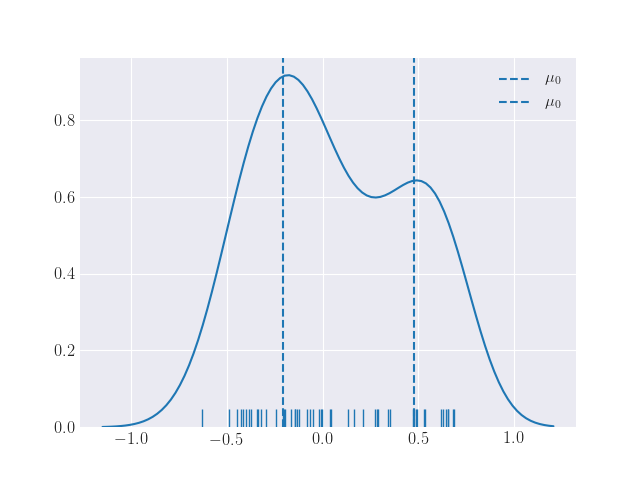

In [3]:
fig, ax = plt.subplots(1)
sns.distplot(x, ax=ax, hist=False, rug=True)
for k in range(num_classes):
    ax.axvline(x=class_mus[k], linestyle="--", label="$\mu_0$")
ax.legend(loc="best")

Set up helper methods to compute log likelihood and lower bound, as well as plotting both.

In [4]:
def log_likelihood(x, theta):
    """
    Compute log of the marginal likelihood over x given the current set of parameter estimates
    """
    
    # Destruct theta
    mus, stds, pis = theta
    
    num_classes = len(mus)
    likelihoods = np.zeros(len(x), dtype=np.float64)
    for k in range(num_classes):
        likelihoods += pis[k] * stats.norm.pdf(x, loc=mus[k], scale=stds[k])
        
    return np.sum(np.log(likelihoods))


def lower_bound(x, theta, responsibilities):
    # Destruct theta
    mus, stds, pis = theta
    num_classes = len(mus)
    
    # The lower bounds consists of two components: the complete-data log likelihood and the entropy of q(Z).
    complete_data_log_likelihood = 0
    for k in range(num_classes):
        complete_data_log_likelihood += np.sum(responsibilities[:, k] * (stats.norm.logpdf(x, mus[k], stds[k]) + np.log(pis[k])))
    
    entropy = -np.sum(responsibilities * np.log(responsibilities))
    return complete_data_log_likelihood + entropy


def plot_likelihood_lower_bound(x, theta, responsibilities, ax):
    # Destruct theta
    mus, stds, pis = theta
    
    # Compute lower bound with old estimate mu_0
    mu_0_old = mus[0]
    lower_bound_m_0_old = lower_bound(x, theta, responsibilities)
    
    # The new estimate for mu_0 is computed by maximizing the complete-data log likelihood
    N_k = np.sum(responsibilities, axis=0)
    mus_new = np.sum(responsibilities * x[:, None], axis=0) / N_k
    mu_0_new = mus_new[0]
    # Compute log likelihood for new estimate for mu_0
    log_likelihood_m_0_new = log_likelihood(x, ((mu_0_new, mus[1]), stds, pis))
    
    # Plot log likelihood and lower bound as a function of different values for mu_0
    # Define range of mu values to visualize based on old and new estimate
    dx = max(abs(mu_0_new - mu_0_old), 0.01)
    min_candidate = min(mu_0_old, mu_0_new) - 1 * dx
    max_candidate = max(mu_0_old, mu_0_new) + 1 * dx
    mu_0_candidates = np.linspace(min_candidate, max_candidate, num=100)

    # Compute log likelihood and lower bound for different values of mu_0
    log_likelihoods = []
    lower_bounds = []
    for mu_0 in mu_0_candidates:
        theta_ = ((mu_0, mus[1]), stds, pis)
        log_likelihoods.append(log_likelihood(x, theta_))
        lower_bounds.append(lower_bound(x, theta_, responsibilities))
        
    # Plot log likelihood and lower bound
    ax.plot(mu_0_candidates, log_likelihoods, label="$\ln p(\mathbf{X} | \mathbf{\\theta})$")
    ax.plot(mu_0_candidates, lower_bounds, label="$\mathcal{L}(q, \mathbf{\\theta})$")
    
    # Draw vertical line as high as the lower bound for the old estimate
    y_min, y_max = ax.get_ylim()
    ax.axvline(x=mu_0_old, ymax=(lower_bound_m_0_old - y_min) / (y_max - y_min), label="$\mu_0^{old}$", linestyle="dashed", color="black")
    
    # Draw vertical line as high as log likelihood for the new estimate
    ax.axvline(x=mu_0_new, ymax=(log_likelihood_m_0_new - y_min) / (y_max - y_min), label="$\mu_0^{new}$", linestyle=":", color="black")
    
    ax.set_xlabel("$\mu_0$")
    ax.legend(loc="best", fontsize="small")

For illustration purposes, plot the log likelihood as a function of $\mu_0$.

<IPython.core.display.Javascript object>


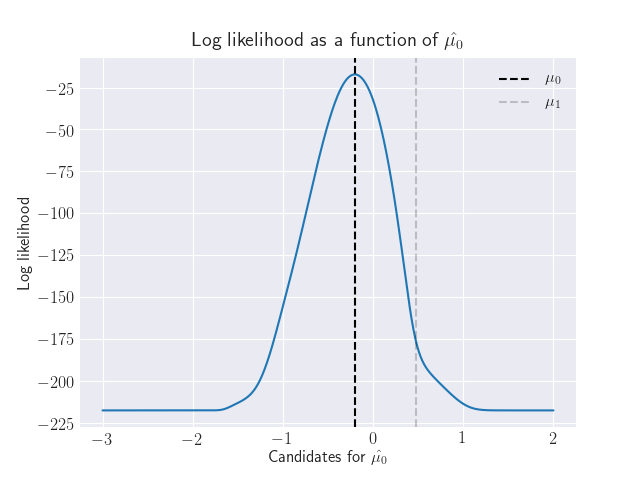

Text(0.5, 1.0, 'Log likelihood as a function of $\\hat{\\mu_0}$')

In [5]:
# Assume that all parameters are known except for mu_0
mu_0_candidates = np.linspace(-3, 2, 500)
log_likelihoods = []
for mu_0_candidate in mu_0_candidates:
    theta = ((mu_0_candidate, class_mus[1]), class_sigmas, priors)
    log_likelihoods.append(log_likelihood(x, theta))
    
fig, ax = plt.subplots(1)
ax.plot(mu_0_candidates, log_likelihoods)
ax.axvline(x=class_mus[0], linestyle="--", color="k", label="$\mu_0$")
ax.axvline(x=class_mus[1], linestyle="--", color="k", alpha=0.2, label="$\mu_1$")
ax.legend(loc="best")
ax.set_xlabel("Candidates for $\hat{\mu_0}$")
ax.set_ylabel("Log likelihood")
ax.set_title("Log likelihood as a function of $\hat{\mu_0}$")

## Expectation Maximization

**E-step**: Compute responsibilities
$$
\gamma(z_{nk}) = p(z_{nk} = 1 \lvert x_n, \mathbf{\theta}) = \frac{\pi_k \mathcal{N}(x_n \lvert \mu_k^{\text{old}} , \sigma_k^{2~\text{old}})}{\sum\limits_j^K \pi_j \mathcal{N}(x_n \lvert \mu_j^{\text{old}}, \sigma_j^{2~\text{old}})}
$$

**M-step**: Maximize complete-data log likelihood w.r.t. parameters

$$
\mu_k^{\text{new}} = \frac{1}{N_k} \sum\limits_{n=1}^N \gamma(z_{nk}) x_n \\
\sigma_k^{2~\text{new}} = \frac{1}{N_k} \sum\limits_{n=1}^N  \gamma(z_{nk}) (x_n - \mu_k)^2 \\
\pi_k^{\text{new}} = \frac{N_k}{N}
$$

where
$$
N_k = \sum\limits_{n=1}^N \gamma(z_{nk})
$$

<IPython.core.display.Javascript object>


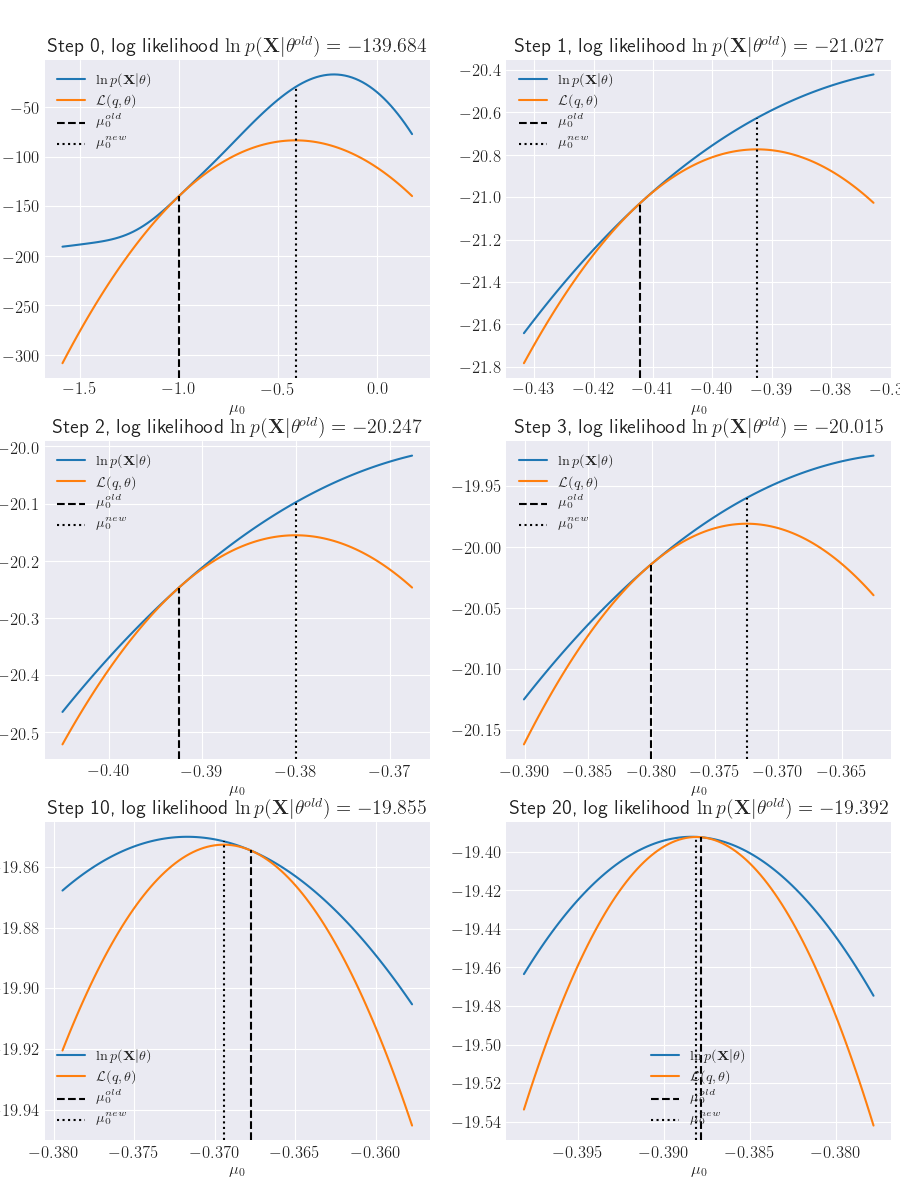

In [6]:
def expectation_maximization(x, theta, max_iterations=50, show_steps=[0, 1, 2, 3, 10, 20]):
    # Destruct theta
    mus, stds, pis = theta
    
    num_samples = len(x)
    num_classes = len(mus)
    
    num_rows = int(np.ceil(len(show_steps) / 2))
    fig, axes = plt.subplots(num_rows, 2, figsize=(9, 4 * num_rows))
    fig.subplots_adjust(left=0.05, right=0.99, bottom=0.05, top=0.95)
    next_ax_idx = 0
    
    for i in range(max_iterations):
        # Keep track of previous parameters to check for convergence
        previous_theta = theta
        
        # E-step: Maximize the lower bound w.r.t. q(Z) while holding the parameters theta fixed.
        # Compute responsibilities
        responsibilities = np.zeros((num_samples, num_classes), dtype=np.float64)
        for k in range(num_classes):
            responsibilities[:, k] = pis[k] * stats.norm.pdf(x, mus[k], stds[k])

        # Normalize responsibilities
        responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)

        # After the E-step, compute the lower bound
        # Plot the marginal likelihood and the lower bound as a function of the parameters
        if i in show_steps:
            ax = axes[next_ax_idx // 2, next_ax_idx % 2]
            plot_likelihood_lower_bound(x, theta, responsibilities, ax=ax)
            ax.set_title("Step {:d}, log likelihood $\ln p(\mathbf{{X}} | \mathbf{{\\theta}}^{{old}}) = {:4.3f}$".format(i, log_likelihood(x, theta)))
            next_ax_idx += 1
        
        # M-step: Maximize the lower bound w.r.t. the parameters theta while holding q(Z) fixed.
        N_k = np.sum(responsibilities, axis=0)
        mus = np.sum(responsibilities * x[:, None], axis=0) / N_k
        stds = np.sqrt(np.sum(responsibilities * (x[:, None] - mus) ** 2, axis=0) / N_k)
        pis = N_k / num_samples
        
        # Evaluate the log likelihood
        theta = (mus, stds, pis)
        
        if np.allclose(theta, previous_theta):
            return theta
    
    return theta


initial_theta = (np.array([-1., class_mus[1]]), # Class means
                 class_sigmas, # Class standard deviations
                 np.array([0.5, 0.5])) # Mixture coefficients

theta_hat = expectation_maximization(x, initial_theta)

The figures illustrate the the log marginal likelihood (blue curve) and the lower bound (orange curve) as a function of $\mu_0$. Each E-step computes a lower bound that is tangential to the log marginal likelihood at the current set of parameters (dashed vertical line). The M-step updates the parameters to maximize the lower bound (dotted vertical line).

Note that we optimize all parameters $\mathbf{\theta}$ but display the optimization landscape only as a function of $\mu_0$. Therefore, the likelihood printed in each title can be higher than the graphical illustration in the previous step.

## Summary

While introducing the lower bound formuluation is not necessary to implement the algorithm, the lower bound illustrates why Expectation Maximization is guaranteed to improve the log likelihood with every pair of steps (unless it is already at a maximum).